In [1]:
import tensorflow as tf
from keras import Model
from keras.layers import Input,Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


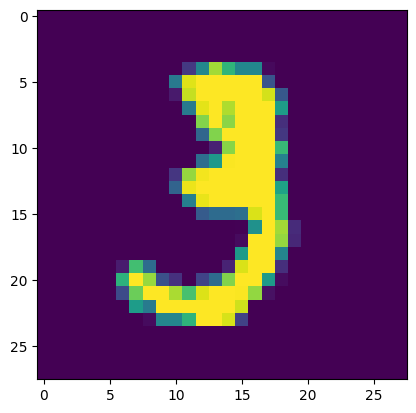

In [3]:
plt.imshow(X_train[10])

In [4]:
#reshape into vector and normalize
X_train=X_train.reshape((X_train.shape[0],28*28)).astype('float32')/255
X_test=X_test.reshape((X_test.shape[0],28*28)).astype('float32')/255
print(X_train.shape)

(60000, 784)


In [5]:
#MODEL
#encoder
input_layer = Input(shape=(784,))
l1 = Dense(128,activation='relu')(input_layer)
encoded_layer = Dense(64,activation='relu')(l1)
#decoder
l2 = Dense(128,activation='relu')(encoded_layer)
output = Dense(784,activation='sigmoid')(l2)

In [6]:
autoencoder = Model(inputs=input_layer, outputs=output)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
encoder=Model(inputs=input_layer,outputs=encoded_layer)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,736 (424.75 KB)

 Trainable params: 108,736 (424.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
decoder=Model(inputs=encoded_layer,outputs=output)
decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_2CLONE             │ (None, 64)             │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,456 (427.56 KB)

 Trainable params: 109,456 (427.56 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoencoder.compile(optimizer='adam', loss='mse')
history=autoencoder.fit(x=X_train,y=X_train,epochs=20,batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0705
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0173
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0123
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0103
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0075
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0065
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

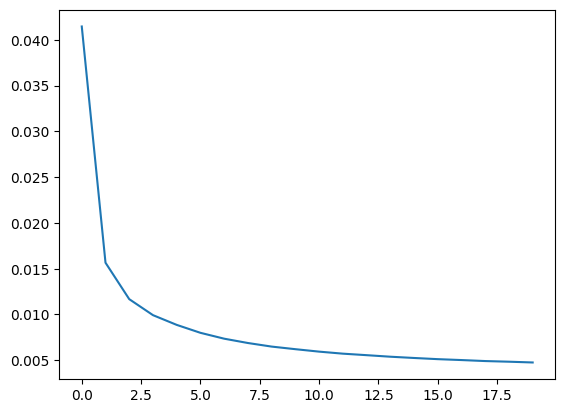

In [10]:
plt.plot(history.history['loss'])

In [11]:
encoded_data=encoder.predict(X_test,batch_size=512)
encoded_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(10000, 64)

In [12]:
decoded_data=decoder.predict(encoded_data,batch_size=512)
decoded_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(10000, 784)

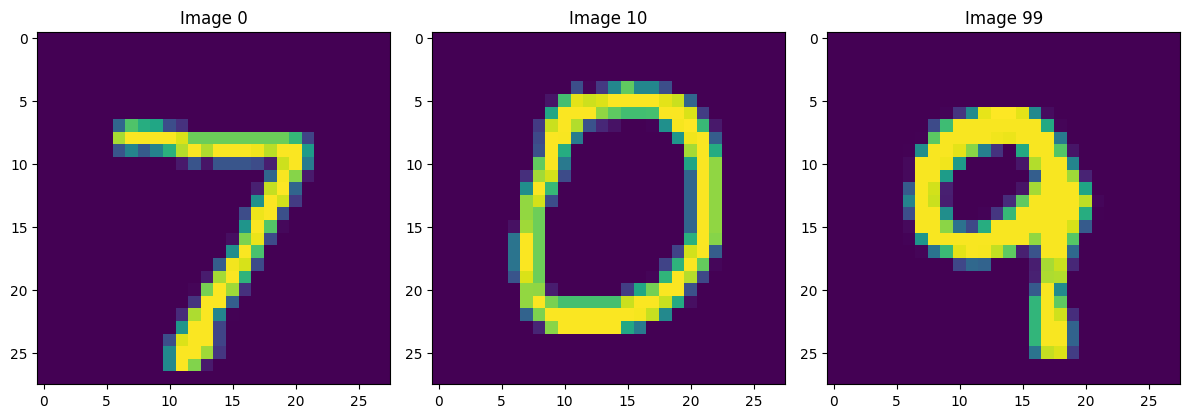

In [13]:
X_test=X_test.reshape((X_test.shape[0],28,28))
X_test.shape
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_test[0])
plt.title('Image 0')

plt.subplot(1, 3, 2)
plt.imshow(X_test[10])
plt.title('Image 10')

plt.subplot(1, 3, 3)
plt.imshow(X_test[99])
plt.title('Image 99')

plt.tight_layout()
plt.show()

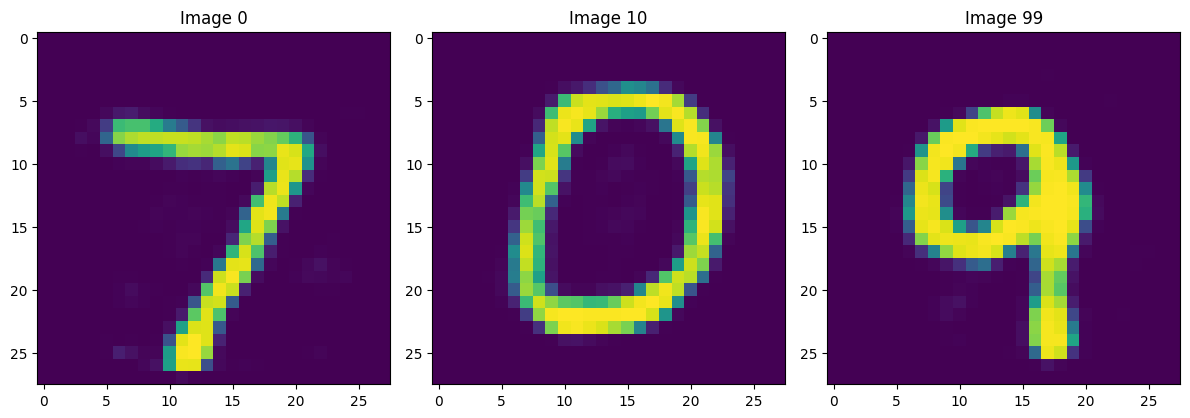

In [14]:
decoded_data=decoded_data.reshape((decoded_data.shape[0],28,28))
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(decoded_data[0])
plt.title('Image 0')

plt.subplot(1, 3, 2)
plt.imshow(decoded_data[10])
plt.title('Image 10')

plt.subplot(1, 3, 3)
plt.imshow(decoded_data[99])
plt.title('Image 99')

plt.tight_layout()
plt.show()